1. What is the avg age of each gender for the heart attack prediction?
2. Does a chest pain type is more prevalent in one gender?
3. How is age related to BP, Sugar, cholesterol? A scatter plot can possibly be used here. 

Some things you can do:
1) Check the distribution of target variables. Whether there are some case of imbalance data.
2) After converting variables to appropriate format, you can check correlation all dependent on independent variables.
3) Analyse the distribution of each feature.
4) Read a little form internet to gain domain knowledge of heart disease and causes. And verify whether what you have studied is actually proved by the data set.
5) Data Quality check: Missing, NaN, Imputation, incorrect values, outlier etc.
6) Develop a baseline model, and check confusion matrix to evaluate.
7) Determine whether type 1 error or type 2 error will be more crucial and why?
8) Check the data for certain age groups ( for example of senior citizen) and compare whether the chances of heart attack are high as compared to other groups. If yes, what other features are contributing to that?
9) Try different types plots scatter, hist, line etc to comprehend your understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.HeartDisease.unique()

array([0, 1])

In [8]:
df.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [9]:
df.isnull().count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

What is the avg age of each gender for the heart attack prediction?

In [13]:
df_by_age = df.groupby(["Age"]).apply(display)
df_by_age

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
208,28,M,ATA,130,132,0,LVH,185,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
56,31,M,ASY,120,270,0,Normal,153,Y,1.5,Flat,1
203,31,F,ATA,100,219,0,ST,150,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
35,32,M,ATA,125,254,0,Normal,155,N,0.0,Up,0
67,32,M,ATA,110,225,0,Normal,184,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
271,32,F,ATA,105,198,0,Normal,165,N,0.0,Up,0
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
115,33,F,ASY,100,246,0,Normal,150,Y,1.0,Flat,1
223,33,M,NAP,120,298,0,Normal,185,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
107,34,M,ATA,150,214,0,ST,168,N,0.0,Up,0
119,34,M,TA,140,156,0,Normal,180,N,0.0,Flat,1
126,34,F,ATA,130,161,0,Normal,190,N,0.0,Up,0
267,34,M,ATA,98,220,0,Normal,150,N,0.0,Up,0
313,34,M,ASY,115,0,1,Normal,154,N,0.2,Up,1
753,34,F,ATA,118,210,0,Normal,192,N,0.7,Up,0
789,34,M,TA,118,182,0,LVH,174,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
42,35,M,ATA,150,264,0,Normal,168,N,0.0,Up,0
77,35,F,ASY,140,167,0,Normal,150,N,0.0,Up,0
118,35,F,TA,120,160,0,ST,185,N,0.0,Up,0
206,35,M,ATA,120,308,0,LVH,180,N,0.0,Up,0
207,35,M,ATA,110,257,0,Normal,140,N,0.0,Flat,1
405,35,M,ASY,120,0,1,Normal,130,Y,1.2,Flat,1
512,35,M,NAP,123,161,0,ST,153,N,-0.1,Up,0
696,35,M,ASY,120,198,0,Normal,130,Y,1.6,Flat,1
808,35,M,ASY,126,282,0,LVH,156,Y,0.0,Up,1
839,35,F,ASY,138,183,0,Normal,182,N,1.4,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
19,36,M,ATA,120,267,0,Normal,160,N,3.0,Flat,1
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
48,36,M,NAP,112,340,0,Normal,184,N,1.0,Flat,0
257,36,M,NAP,150,160,0,Normal,172,N,0.0,Up,0
289,36,M,ATA,120,166,0,Normal,180,N,0.0,Up,0
349,36,M,ASY,110,0,1,Normal,125,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
46,37,M,ASY,120,223,0,Normal,168,N,0.0,Up,0
65,37,F,ATA,120,260,0,Normal,130,N,0.0,Up,0
178,37,M,NAP,130,194,0,Normal,150,N,0.0,Up,0
229,37,F,ASY,130,173,0,ST,184,N,0.0,Up,0
230,37,M,ASY,130,315,0,Normal,158,N,0.0,Up,0
587,37,M,NAP,118,240,0,LVH,165,N,1.0,Flat,0
647,37,F,NAP,120,215,0,Normal,170,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1
113,38,M,ATA,140,297,0,Normal,150,N,0.0,Up,0
116,38,M,ASY,120,282,0,Normal,170,N,0.0,Flat,1
130,38,M,NAP,145,292,0,Normal,130,N,0.0,Up,0
156,38,M,ASY,110,190,0,Normal,150,Y,1.0,Flat,1
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
232,38,F,ATA,120,275,0,Normal,129,N,0.0,Up,0
322,38,F,ASY,105,0,1,Normal,166,N,2.8,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
358,38,M,NAP,115,0,0,Normal,128,Y,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
12,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0
91,39,M,ASY,130,307,0,Normal,140,N,0.0,Up,0
94,39,F,NAP,110,182,0,ST,180,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
137,39,M,ATA,120,241,0,ST,146,N,2.0,Up,0
145,39,M,ASY,110,273,0,Normal,132,N,0.0,Up,0
150,39,M,ATA,130,215,0,Normal,120,N,0.0,Up,0
216,39,M,ASY,110,280,0,Normal,150,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
24,40,M,NAP,130,215,0,Normal,138,N,0.0,Up,0
102,40,F,ASY,150,392,0,Normal,130,N,2.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
152,40,M,ATA,130,275,0,Normal,150,N,0.0,Up,0
171,40,M,NAP,140,235,0,Normal,188,N,0.0,Up,0
231,40,M,NAP,130,281,0,Normal,167,N,0.0,Up,0
333,40,M,ASY,95,0,1,ST,144,N,0.0,Up,1
457,40,M,ASY,125,0,1,Normal,165,N,0.0,Flat,1
507,40,M,NAP,106,240,0,Normal,80,Y,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
33,41,M,ASY,130,172,0,ST,130,N,2.0,Flat,1
37,41,F,ATA,110,250,0,ST,142,N,0.0,Up,0
49,41,M,ASY,110,289,0,Normal,170,N,0.0,Flat,1
53,41,F,ATA,130,245,0,Normal,150,N,0.0,Up,0
99,41,M,ATA,125,269,0,Normal,144,N,0.0,Up,0
154,41,M,ATA,120,291,0,ST,160,N,0.0,Up,0
187,41,M,ASY,120,237,1,Normal,138,Y,1.0,Flat,1
194,41,F,ATA,125,184,0,Normal,180,N,0.0,Up,0
228,41,M,ATA,120,295,0,Normal,170,N,0.0,Up,0
233,41,M,ASY,112,250,0,Normal,142,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
14,42,F,NAP,115,211,0,ST,137,N,0.0,Up,0
129,42,M,NAP,120,228,0,Normal,152,Y,1.5,Flat,0
146,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
163,42,M,ATA,120,196,0,Normal,150,N,0.0,Up,0
197,42,M,ATA,150,268,0,Normal,136,N,0.0,Up,0
202,42,M,NAP,160,147,0,Normal,146,N,0.0,Up,0
284,42,M,ASY,140,358,0,Normal,170,N,0.0,Up,0
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
386,42,M,ASY,145,0,0,Normal,99,Y,0.0,Flat,1
465,42,M,NAP,134,240,0,Normal,160,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
17,43,F,ATA,120,201,0,Normal,165,N,0.0,Up,0
20,43,F,TA,100,223,0,Normal,142,N,0.0,Up,0
34,43,F,ATA,150,186,0,Normal,154,N,0.0,Up,0
44,43,M,ASY,120,175,0,Normal,120,Y,1.0,Flat,1
61,43,F,NAP,150,254,0,Normal,175,N,0.0,Up,0
88,43,M,TA,120,291,0,ST,155,N,0.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
136,43,F,ATA,120,215,0,ST,175,N,0.0,Up,0
139,43,M,ASY,150,247,0,Normal,130,Y,2.0,Flat,1
147,43,F,ATA,120,249,0,ST,176,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
21,44,M,ATA,120,184,0,Normal,142,N,1.0,Flat,0
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
71,44,M,ATA,130,215,0,Normal,135,N,0.0,Up,0
73,44,F,ASY,120,218,0,ST,115,N,0.0,Up,0
158,44,M,ASY,130,290,0,Normal,100,Y,2.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
417,44,M,ASY,130,209,0,ST,127,N,0.0,Up,0
627,44,M,NAP,140,235,0,LVH,180,N,0.0,Up,0
657,44,M,NAP,130,233,0,Normal,179,Y,0.4,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
52,45,M,ATA,140,224,1,Normal,122,N,0.0,Up,0
62,45,M,ASY,140,224,0,Normal,144,N,0.0,Up,0
66,45,F,ASY,132,297,0,Normal,144,N,0.0,Up,0
193,45,M,NAP,135,192,0,Normal,110,N,0.0,Up,0
248,45,M,ASY,130,219,0,ST,130,Y,1.0,Flat,1
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up,0
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
525,45,M,NAP,130,236,0,Normal,144,N,0.1,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
63,46,M,ASY,120,277,0,Normal,125,Y,1.0,Flat,1
75,46,M,NAP,150,163,0,Normal,116,N,0.0,Up,0
104,46,M,ASY,118,186,0,Normal,124,N,0.0,Flat,1
122,46,M,ASY,110,240,0,ST,140,N,0.0,Up,0
131,46,M,ASY,110,202,0,Normal,150,Y,0.0,Flat,1
165,46,M,TA,140,272,1,Normal,175,N,2.0,Flat,1
179,46,F,ASY,130,238,0,Normal,90,N,0.0,Up,0
183,46,M,ASY,110,238,0,ST,140,Y,1.0,Flat,0
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
201,46,M,NAP,120,230,0,Normal,150,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
51,47,F,ASY,120,205,0,Normal,98,Y,2.0,Flat,1
112,47,M,ASY,140,276,1,Normal,125,Y,0.0,Up,0
120,47,F,NAP,135,248,1,Normal,170,N,0.0,Flat,1
142,47,M,ASY,160,291,0,ST,158,Y,3.0,Flat,1
162,47,M,ATA,160,263,0,Normal,174,N,0.0,Up,0
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up,0
214,47,M,ASY,150,226,0,Normal,98,Y,1.5,Flat,1
264,47,M,NAP,140,193,0,Normal,145,Y,1.0,Flat,1
269,47,F,NAP,130,235,0,Normal,145,N,2.0,Flat,0
291,47,F,ATA,140,257,0,Normal,135,N,1.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
38,48,F,ATA,120,177,1,ST,148,N,0.0,Up,0
39,48,F,ASY,150,227,0,Normal,130,Y,1.0,Flat,0
93,48,M,ASY,160,329,0,Normal,92,Y,1.5,Flat,1
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up,0
127,48,F,ASY,108,163,0,Normal,175,N,2.0,Up,0
151,48,M,ATA,100,159,0,Normal,100,N,0.0,Up,0
167,48,M,ATA,140,238,0,Normal,118,N,0.0,Up,0
192,48,M,ATA,130,245,0,Normal,160,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
22,49,F,ATA,124,201,0,Normal,164,N,0.0,Up,0
60,49,M,ATA,100,253,0,Normal,174,N,0.0,Up,0
79,49,M,ASY,130,206,0,Normal,170,N,0.0,Flat,1
90,49,F,ATA,110,208,0,Normal,160,N,0.0,Up,0
114,49,F,NAP,130,207,0,ST,135,N,0.0,Up,0
135,49,M,NAP,115,265,0,Normal,175,N,0.0,Flat,1
157,49,M,ASY,140,185,0,Normal,130,N,0.0,Up,0
161,49,M,ASY,128,212,0,Normal,96,Y,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
47,50,M,ATA,140,216,0,Normal,170,N,0.0,Up,0
50,50,M,ASY,130,233,0,Normal,121,Y,2.0,Flat,1
64,50,F,ATA,110,202,0,Normal,145,N,0.0,Up,0
108,50,M,ASY,140,129,0,Normal,135,N,0.0,Up,0
141,50,M,ASY,140,341,0,ST,125,Y,2.5,Flat,1
148,50,M,ATA,120,168,0,Normal,160,N,0.0,Up,0
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
188,50,F,ASY,120,328,0,Normal,110,Y,1.0,Flat,0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
205,50,M,ASY,150,215,0,Normal,140,Y,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
29,51,M,ATA,125,188,0,Normal,145,N,0.0,Up,0
55,51,F,ATA,160,194,0,Normal,170,N,0.0,Up,0
101,51,M,ASY,130,179,0,Normal,100,N,0.0,Up,0
181,51,M,ATA,130,224,0,Normal,150,N,0.0,Up,0
221,51,F,ASY,160,303,0,Normal,150,Y,1.0,Flat,1
258,51,F,NAP,150,200,0,Normal,120,N,0.5,Up,0
276,51,M,NAP,135,160,0,Normal,150,N,2.0,Flat,1
282,51,F,NAP,130,220,0,Normal,160,Y,2.0,Up,0
285,51,F,NAP,110,190,0,Normal,120,N,0.0,Up,0
298,51,M,ASY,110,0,1,Normal,92,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
27,52,M,ATA,120,284,0,Normal,118,N,0.0,Up,0
43,52,M,NAP,140,259,0,ST,170,N,0.0,Up,0
54,52,F,ASY,130,180,0,Normal,140,Y,1.5,Flat,0
59,52,M,ASY,112,342,0,ST,96,Y,1.0,Flat,1
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
72,52,M,ASY,120,182,0,Normal,150,N,0.0,Flat,1
78,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
83,52,M,ATA,160,196,0,Normal,165,N,0.0,Up,0
92,52,F,ATA,120,210,0,Normal,148,N,0.0,Up,0
121,52,F,NAP,125,272,0,Normal,139,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
26,53,M,ASY,124,260,0,ST,112,Y,3.0,Flat,0
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
87,53,F,ATA,140,216,0,Normal,142,Y,2.0,Flat,0
143,53,M,ASY,140,243,0,Normal,155,N,0.0,Up,0
172,53,M,ATA,140,320,0,Normal,162,N,0.0,Up,0
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
198,53,M,ASY,120,246,0,Normal,116,Y,0.0,Flat,1
226,53,M,NAP,120,195,0,Normal,140,N,0.0,Up,0
255,53,F,NAP,120,274,0,Normal,130,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
15,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
32,54,M,ASY,125,224,0,Normal,122,N,2.0,Flat,1
40,54,F,ATA,150,230,0,Normal,130,N,0.0,Up,0
41,54,F,NAP,130,294,0,ST,100,Y,0.0,Flat,1
58,54,M,ASY,150,365,0,ST,134,N,1.0,Up,0
81,54,M,ATA,120,238,0,Normal,154,N,0.0,Up,0
125,54,M,ATA,120,246,0,Normal,110,N,0.0,Up,0
128,54,F,ATA,120,230,1,Normal,140,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
74,55,M,ASY,140,268,0,Normal,128,Y,1.5,Flat,1
80,55,M,NAP,110,277,0,Normal,160,N,0.0,Up,0
89,55,M,ASY,140,229,0,Normal,110,Y,0.5,Flat,0
153,55,M,ASY,120,270,0,Normal,140,N,0.0,Up,0
218,55,M,ATA,140,196,0,Normal,150,N,0.0,Up,0
224,55,M,ATA,120,256,1,Normal,137,N,0.0,Up,0
237,55,M,TA,140,295,0,Normal,136,N,0.0,Flat,1
240,55,M,ATA,145,326,0,Normal,155,N,0.0,Up,0
242,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1
254,55,M,ASY,145,248,0,Normal,96,Y,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
31,56,M,NAP,130,167,0,Normal,114,N,0.0,Up,0
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1
133,56,M,ASY,150,230,0,ST,124,Y,1.5,Flat,1
144,56,F,ATA,120,279,0,Normal,150,N,1.0,Flat,1
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat,1
204,56,M,ATA,130,184,0,Normal,100,N,0.0,Up,0
212,56,M,NAP,130,276,0,Normal,128,Y,1.0,Up,0
213,56,F,NAP,130,219,0,ST,164,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
70,57,M,ATA,140,265,0,ST,145,Y,1.0,Flat,1
105,57,M,ATA,140,260,1,Normal,140,N,0.0,Up,0
111,57,M,ASY,150,255,0,Normal,92,Y,3.0,Flat,1
199,57,F,TA,130,308,0,Normal,98,N,1.0,Flat,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
309,57,M,ASY,95,0,1,Normal,182,N,0.7,Down,1
316,57,M,NAP,105,0,1,Normal,148,N,0.3,Flat,1
368,57,M,ASY,140,0,0,Normal,120,Y,2.0,Flat,1
394,57,M,ASY,160,0,1,Normal,98,Y,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
57,58,M,NAP,130,213,0,ST,140,N,0.0,Flat,1
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
124,58,M,ATA,130,230,0,Normal,150,N,0.0,Up,0
168,58,M,ASY,135,222,0,Normal,100,N,0.0,Up,0
169,58,M,NAP,140,179,0,Normal,160,N,0.0,Up,0
185,58,M,NAP,160,211,1,ST,92,N,0.0,Flat,1
186,58,M,ATA,130,251,0,Normal,110,N,0.0,Up,0
308,58,M,ASY,115,0,1,Normal,138,N,0.5,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
45,59,M,NAP,130,318,0,Normal,120,Y,1.0,Flat,0
110,59,F,ATA,130,188,0,Normal,124,N,1.0,Flat,0
117,59,F,ASY,130,338,1,ST,130,Y,1.5,Flat,1
160,59,M,ASY,140,264,1,LVH,119,Y,0.0,Flat,1
177,59,M,ATA,140,287,0,Normal,150,N,0.0,Up,0
263,59,M,ASY,130,126,0,Normal,125,N,0.0,Flat,1
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
286,59,M,ASY,140,169,0,Normal,140,N,0.0,Up,0
320,59,M,NAP,125,0,1,Normal,175,N,2.6,Flat,1
327,59,M,ASY,125,0,1,Normal,119,Y,0.9,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
280,60,M,NAP,120,246,0,LVH,135,N,0.0,Up,0
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1
311,60,M,ASY,125,0,1,Normal,110,N,0.1,Up,1
329,60,M,ASY,130,0,1,ST,130,Y,1.1,Down,1
330,60,M,NAP,115,0,1,Normal,143,N,2.4,Up,1
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
380,60,M,ASY,160,0,0,ST,99,Y,0.5,Flat,1
418,60,M,ASY,132,218,0,ST,140,Y,1.5,Down,1
423,60,M,NAP,180,0,0,ST,140,Y,1.5,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
134,61,F,ASY,130,294,0,ST,120,Y,1.0,Flat,0
252,61,M,ASY,125,292,0,ST,115,Y,0.0,Up,0
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
318,61,M,ASY,130,0,1,Normal,77,N,2.5,Flat,1
342,61,M,ASY,110,0,1,Normal,113,N,1.4,Flat,1
366,61,M,ASY,150,0,0,Normal,117,Y,2.0,Flat,1
374,61,M,ASY,125,0,0,Normal,105,Y,0.0,Down,1
385,61,M,ASY,150,0,0,Normal,105,Y,0.0,Flat,1
389,61,M,ASY,160,0,1,ST,145,N,1.0,Flat,1
392,61,M,ASY,130,0,0,LVH,115,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
195,62,F,TA,160,193,0,Normal,116,N,0.0,Up,0
253,62,M,ATA,140,271,0,Normal,152,N,1.0,Up,0
303,62,F,ASY,120,0,1,ST,123,Y,1.7,Down,1
323,62,M,ASY,115,0,1,Normal,128,Y,2.5,Down,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
360,62,M,NAP,160,0,0,Normal,72,Y,0.0,Flat,1
396,62,F,TA,140,0,1,Normal,143,N,0.0,Flat,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1
410,62,M,ASY,150,0,1,ST,78,N,2.0,Flat,1
428,62,M,ASY,110,0,0,Normal,120,Y,0.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
82,63,M,ASY,150,223,0,Normal,115,N,0.0,Flat,1
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
337,63,M,ASY,150,0,1,ST,154,N,3.7,Up,1
338,63,M,ASY,140,0,1,LVH,149,N,2.0,Up,1
369,63,M,ASY,150,0,0,Normal,86,Y,2.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1
416,63,M,ASY,140,260,0,ST,112,Y,3.0,Flat,1
429,63,M,NAP,133,0,0,LVH,120,Y,1.0,Flat,1
432,63,M,ASY,170,177,0,Normal,84,Y,2.5,Down,1
434,63,M,ASY,126,0,0,ST,120,N,1.5,Down,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
339,64,F,ASY,95,0,1,Normal,145,N,1.1,Down,1
341,64,M,ASY,110,0,1,Normal,114,Y,1.3,Down,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
437,64,M,ASY,120,0,1,ST,106,N,2.0,Flat,1
451,64,M,ASY,144,0,0,ST,122,Y,1.0,Flat,1
495,64,F,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
520,64,M,ASY,130,223,0,ST,128,N,0.5,Flat,0
531,64,M,ASY,143,306,1,ST,115,Y,1.8,Flat,1
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
572,64,M,ASY,150,193,0,ST,135,Y,0.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1
86,65,M,ASY,170,263,1,Normal,112,Y,2.0,Flat,1
100,65,M,ASY,130,275,0,ST,115,Y,1.0,Flat,1
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
310,65,M,ASY,155,0,0,Normal,154,N,1.0,Up,0
377,65,M,ASY,160,0,1,ST,122,N,1.2,Flat,1
402,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1
422,65,M,ASY,150,236,1,ST,105,Y,0.0,Flat,1
484,65,M,ASY,134,0,0,Normal,112,Y,1.1,Flat,1
488,65,M,TA,140,252,0,Normal,135,N,0.3,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
85,66,M,ASY,140,139,0,Normal,94,Y,1.0,Flat,1
371,66,M,ASY,150,0,0,Normal,108,Y,2.0,Flat,1
415,66,F,ASY,155,0,1,Normal,90,N,0.0,Flat,1
420,66,M,NAP,110,213,1,LVH,99,Y,1.3,Flat,0
421,66,M,NAP,120,0,0,ST,120,N,-0.5,Up,0
548,66,M,ASY,112,261,0,Normal,140,N,1.5,Up,1
646,66,M,ASY,160,228,0,LVH,138,N,2.3,Up,0
663,66,M,ATA,160,246,0,Normal,120,Y,0.0,Flat,1
711,66,M,ASY,120,302,0,LVH,151,N,0.4,Flat,0
733,66,F,TA,150,226,0,Normal,114,N,2.6,Down,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
355,67,M,TA,145,0,0,LVH,125,N,0.0,Flat,1
482,67,M,TA,142,270,1,Normal,125,N,2.5,Up,1
498,67,M,ASY,160,384,1,ST,130,Y,0.0,Flat,1
508,67,M,ASY,120,0,1,Normal,150,N,1.5,Down,1
577,67,M,ASY,146,369,0,Normal,110,Y,1.9,Flat,1
588,67,M,ASY,140,219,0,ST,122,Y,2.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
635,67,M,ASY,120,229,0,LVH,129,Y,2.6,Flat,1
689,67,F,ASY,106,223,0,Normal,142,N,0.3,Up,0
716,67,M,ASY,120,237,0,Normal,71,N,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
319,68,M,ASY,145,0,1,Normal,136,N,1.8,Up,1
367,68,M,ASY,135,0,0,ST,120,Y,0.0,Up,1
471,68,M,ASY,138,0,0,Normal,130,Y,3.0,Flat,1
516,68,M,NAP,150,195,1,Normal,132,N,0.0,Flat,1
549,68,M,TA,139,181,1,ST,135,N,0.2,Up,0
604,68,M,NAP,134,254,1,Normal,151,Y,0.0,Up,0
788,68,F,NAP,120,211,0,LVH,115,N,1.5,Flat,0
815,68,M,NAP,118,277,0,Normal,151,N,1.0,Up,0
855,68,M,NAP,180,274,1,LVH,150,Y,1.6,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
345,69,M,ASY,135,0,0,Normal,130,N,0.0,Flat,1
348,69,M,ASY,137,0,0,ST,104,Y,1.6,Flat,1
441,69,M,ASY,130,0,1,ST,129,N,1.0,Flat,1
481,69,M,NAP,140,0,1,ST,118,N,2.5,Down,1
502,69,M,ASY,140,208,0,ST,140,Y,2.0,Flat,1
571,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
574,69,M,ASY,142,210,1,ST,112,Y,1.5,Flat,1
579,69,M,ASY,145,289,1,ST,110,Y,1.8,Flat,1
582,69,M,ASY,122,216,1,LVH,84,Y,0.0,Flat,1
583,69,M,NAP,142,271,0,LVH,126,N,0.3,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
378,70,M,ASY,140,0,1,Normal,157,Y,2.0,Flat,1
391,70,M,ASY,115,0,0,ST,92,Y,0.0,Flat,1
543,70,M,ASY,170,192,0,ST,129,Y,3.0,Down,1
615,70,M,ASY,130,322,0,LVH,109,N,2.4,Flat,1
687,70,M,ATA,156,245,0,LVH,143,N,0.0,Up,0
804,70,M,NAP,160,269,0,Normal,112,Y,2.9,Flat,1
806,70,M,ASY,145,174,0,Normal,125,Y,2.6,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
552,71,M,NAP,144,221,0,Normal,108,Y,1.8,Flat,1
567,71,M,ASY,130,221,0,ST,115,Y,0.0,Flat,1
630,71,F,ASY,112,149,0,Normal,125,N,1.6,Flat,0
644,71,F,NAP,110,265,1,LVH,130,N,0.0,Up,0
870,71,F,ATA,160,302,0,Normal,162,N,0.4,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
336,72,M,NAP,160,0,0,LVH,114,N,1.6,Flat,0
490,72,M,NAP,120,214,0,Normal,102,Y,1.0,Flat,1
529,72,M,ASY,143,211,0,Normal,109,Y,1.4,Flat,1
573,72,M,ASY,160,123,1,LVH,130,N,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
375,73,F,NAP,160,0,0,ST,121,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
315,74,M,ATA,145,0,1,ST,123,N,1.3,Up,1
439,74,M,NAP,138,0,0,Normal,116,N,0.2,Up,0
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
553,74,M,TA,145,216,1,Normal,116,Y,1.8,Flat,1
589,74,M,NAP,140,237,1,Normal,94,N,0.0,Flat,1
603,74,M,ASY,155,310,0,Normal,112,Y,1.5,Down,1
619,74,F,ATA,120,269,0,LVH,121,Y,0.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
491,75,M,ASY,170,203,1,ST,108,N,0.0,Flat,1
506,75,M,ASY,136,225,0,Normal,112,Y,3.0,Flat,1
556,75,M,ASY,160,310,1,Normal,112,Y,2.0,Down,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
541,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
447,77,M,ASY,124,171,0,ST,110,Y,2.0,Up,1
814,77,M,ASY,125,304,0,LVH,162,Y,0.0,Up,1


""


In [15]:
df.drop_duplicates(subset="Age",keep="first",inplace=True)
df.count()

Age               50
Sex               50
ChestPainType     50
RestingBP         50
Cholesterol       50
FastingBS         50
RestingECG        50
MaxHR             50
ExerciseAngina    50
Oldpeak           50
ST_Slope          50
HeartDisease      50
dtype: int64

In [16]:
# as_index=False allow you to check the condition on a common column and not on an index
df_by_age_sex=df.groupby('Sex', as_index=False).Age.mean()
df_by_age_sex

,Sex,Age
0,F,49.750000
1,M,53.368421


In [20]:
# can also be done simply by this
df_by_age_sex=df.groupby('Sex').mean()
df_by_age_sex

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
M,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724


<AxesSubplot:>

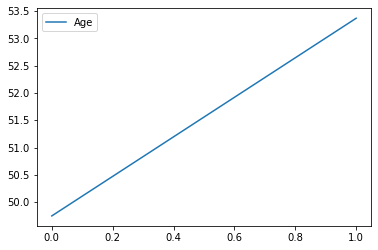

In [19]:
%matplotlib inline
df_by_age_sex.plot()

In [25]:
df_by_age_sex.Age[:]

0    49.750000
1    53.368421
Name: Age, dtype: float64

Does a chest pain type is more prevalent in one gender?

In [26]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [27]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [21]:
df.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

In [22]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

so basically here it needed that
- from all the people
- find out how many got chest pain
- and among these people
- what is the gender distribution
so that we can identify if one gender is getting too much chest pain or it's comparable

In [45]:
# noob way
df2=df.groupby(["ChestPainType"])
df2
df3=df2[["Age",["Sex"]]
df3.count()
# df3[df3.Sex=='F']

SyntaxError: invalid syntax (1290783447.py, line 5)

In [39]:
# good way
df2=df.groupby(["ChestPainType","Sex"]).Sex.count()
df2

ChestPainType  Sex
ASY            F       70
               M      426
ATA            F       60
               M      113
NAP            F       53
               M      150
TA             F       10
               M       36
Name: Sex, dtype: int64

/Users/rmn7591/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unhashable type: 'numpy.ndarray'

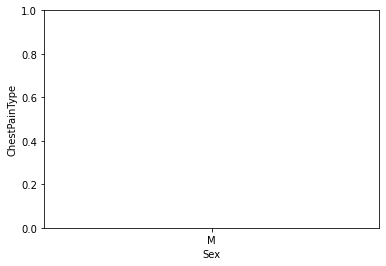

In [58]:
# Dont look into the graphs now
plt.xlabel('Sex')
plt.ylabel('ChestPainType')
plt.plot(df.Sex,df2)

How is age related to BP, Sugar, cholesterol? A scatter plot can possibly be used here.

In [18]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [19]:
df.RestingBP.unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [20]:
df.Cholesterol.unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [46]:
df.FastingBS.unique()

array([0, 1])

In [46]:
df_by_group=df.groupby(["Cholesterol"]).apply(display)
# df_by_group=df.groupby(["Cholesterol","FastingBS","RestingBP"])
df_by_group

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
78,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
444,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
571,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
541,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
573,72,M,ASY,160,123,1,LVH,130,N,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
263,59,M,ASY,130,126,0,Normal,125,N,0.0,Flat,1
675,57,M,NAP,150,126,1,Normal,173,N,0.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
108,50,M,ASY,140,129,0,Normal,135,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
208,28,M,ATA,130,132,0,LVH,185,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
85,66,M,ASY,140,139,0,Normal,94,Y,1.0,Flat,1
611,62,M,TA,135,139,0,ST,137,N,0.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
715,44,F,NAP,108,141,0,Normal,175,N,0.6,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
528,49,M,NAP,131,142,0,Normal,127,Y,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
202,42,M,NAP,160,147,0,Normal,146,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
630,71,F,ASY,112,149,0,Normal,125,N,1.6,Flat,0
661,49,M,NAP,118,149,0,LVH,126,N,0.8,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
580,51,M,ASY,131,152,1,LVH,130,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
468,62,M,ASY,152,153,0,ST,97,Y,1.6,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
119,34,M,TA,140,156,0,Normal,180,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
151,48,M,ATA,100,159,0,Normal,100,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
118,35,F,TA,120,160,0,ST,185,N,0.0,Up,0
257,36,M,NAP,150,160,0,Normal,172,N,0.0,Up,0
276,51,M,NAP,135,160,0,Normal,150,N,2.0,Flat,1
523,59,M,ASY,124,160,0,Normal,117,Y,1.0,Flat,1
524,55,M,ASY,150,160,0,ST,150,N,0.0,Up,0
724,45,F,ATA,112,160,0,Normal,138,N,0.0,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
126,34,F,ATA,130,161,0,Normal,190,N,0.0,Up,0
512,35,M,NAP,123,161,0,ST,153,N,-0.1,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
75,46,M,NAP,150,163,0,Normal,116,N,0.0,Up,0
127,48,F,ASY,108,163,0,Normal,175,N,2.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
590,63,M,ATA,136,165,0,ST,133,N,0.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
138,54,M,ASY,140,166,0,Normal,118,Y,0.0,Flat,1
289,36,M,ATA,120,166,0,Normal,180,N,0.0,Up,0
426,56,M,ATA,126,166,0,ST,140,N,0.0,Up,0
671,61,M,ASY,138,166,0,LVH,125,Y,3.6,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
31,56,M,NAP,130,167,0,Normal,114,N,0.0,Up,0
77,35,F,ASY,140,167,0,Normal,150,N,0.0,Up,0
762,40,M,ASY,110,167,0,LVH,114,Y,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
148,50,M,ATA,120,168,0,Normal,160,N,0.0,Up,0
837,57,M,NAP,150,168,0,Normal,174,N,1.6,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
286,59,M,ASY,140,169,0,Normal,140,N,0.0,Up,0
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
576,62,M,ASY,139,170,0,ST,120,Y,3.0,Flat,1
608,62,M,ASY,158,170,0,ST,138,Y,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
245,54,M,TA,120,171,0,Normal,137,N,2.0,Up,0
447,77,M,ASY,124,171,0,ST,110,Y,2.0,Up,1
566,41,M,ASY,150,171,0,Normal,128,Y,1.5,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
33,41,M,ASY,130,172,0,ST,130,N,2.0,Flat,1
797,41,M,ASY,110,172,0,LVH,158,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
229,37,F,ASY,130,173,0,ST,184,N,0.0,Up,0
578,57,M,ASY,156,173,0,LVH,119,Y,3.0,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
806,70,M,ASY,145,174,0,Normal,125,Y,2.6,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
44,43,M,ASY,120,175,0,Normal,120,Y,1.0,Flat,1
554,53,M,NAP,155,175,1,ST,160,N,0.3,Up,0
868,51,M,NAP,110,175,0,Normal,123,N,0.6,Up,0
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
38,48,F,ATA,120,177,1,ST,148,N,0.0,Up,0
432,63,M,ASY,170,177,0,Normal,84,Y,2.5,Down,1
620,65,M,ASY,120,177,0,Normal,140,N,0.4,Up,0
723,59,M,ASY,140,177,0,Normal,162,Y,0.0,Up,1
750,46,F,NAP,142,177,0,LVH,160,Y,1.4,Down,0
852,43,M,ASY,120,177,0,LVH,120,Y,2.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
672,60,F,NAP,120,178,1,Normal,96,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
101,51,M,ASY,130,179,0,Normal,100,N,0.0,Up,0
169,58,M,NAP,140,179,0,Normal,160,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
54,52,F,ASY,130,180,0,Normal,140,Y,1.5,Flat,0
653,42,M,NAP,130,180,0,Normal,150,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
287,53,M,ATA,120,181,0,Normal,132,N,0.0,Up,0
549,68,M,TA,139,181,1,ST,135,N,0.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
72,52,M,ASY,120,182,0,Normal,150,N,0.0,Flat,1
94,39,F,NAP,110,182,0,ST,180,N,0.0,Up,0
292,53,M,ASY,130,182,0,Normal,148,N,0.0,Up,0
561,54,M,ATA,132,182,0,ST,141,N,0.1,Up,0
789,34,M,TA,118,182,0,LVH,174,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
839,35,F,ASY,138,183,0,Normal,182,N,1.4,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
21,44,M,ATA,120,184,0,Normal,142,N,1.0,Flat,0
194,41,F,ATA,125,184,0,Normal,180,N,0.0,Up,0
204,56,M,ATA,130,184,0,Normal,100,N,0.0,Up,0
801,56,M,ASY,132,184,0,LVH,105,Y,2.1,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
157,49,M,ASY,140,185,0,Normal,130,N,0.0,Up,0
597,55,M,NAP,133,185,0,ST,136,N,0.2,Up,0
863,60,M,NAP,140,185,0,LVH,155,N,3.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
34,43,F,ATA,150,186,0,Normal,154,N,0.0,Up,0
104,46,M,ASY,118,186,0,Normal,124,N,0.0,Flat,1
443,60,M,ASY,130,186,1,ST,140,Y,0.5,Flat,1
532,55,M,ASY,116,186,1,ST,102,N,0.0,Flat,1
595,60,M,ASY,130,186,1,LVH,140,Y,0.5,Flat,1
844,52,M,TA,118,186,0,LVH,190,N,0.0,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
173,49,M,NAP,140,187,0,Normal,172,N,0.0,Up,0
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
29,51,M,ATA,125,188,0,Normal,145,N,0.0,Up,0
110,59,F,ATA,130,188,0,Normal,124,N,1.0,Flat,0
735,49,M,NAP,120,188,0,Normal,139,N,2.0,Flat,1
865,54,M,ASY,120,188,0,Normal,113,N,1.4,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
156,38,M,ASY,110,190,0,Normal,150,Y,1.0,Flat,1
285,51,F,NAP,110,190,0,Normal,120,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
193,45,M,NAP,135,192,0,Normal,110,N,0.0,Up,0
543,70,M,ASY,170,192,0,ST,129,Y,3.0,Down,1
883,57,M,ASY,140,192,0,Normal,148,N,0.4,Flat,0
898,35,M,ATA,122,192,0,Normal,174,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
195,62,F,TA,160,193,0,Normal,116,N,0.0,Up,0
239,48,M,ASY,160,193,0,Normal,102,Y,3.0,Flat,1
264,47,M,NAP,140,193,0,Normal,145,Y,1.0,Flat,1
572,64,M,ASY,150,193,0,ST,135,Y,0.5,Flat,1
773,56,M,TA,120,193,0,LVH,162,N,1.9,Flat,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
55,51,F,ATA,160,194,0,Normal,170,N,0.0,Up,0
178,37,M,NAP,130,194,0,Normal,150,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
159,54,M,ATA,160,195,0,ST,130,N,1.0,Up,0
222,48,F,NAP,120,195,0,Normal,125,N,0.0,Up,0
226,53,M,NAP,120,195,0,Normal,140,N,0.0,Up,0
510,60,M,ASY,136,195,0,Normal,126,N,0.3,Up,0
516,68,M,NAP,150,195,1,Normal,132,N,0.0,Flat,1
668,63,F,ATA,140,195,0,Normal,179,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1
83,52,M,ATA,160,196,0,Normal,165,N,0.0,Up,0
163,42,M,ATA,120,196,0,Normal,150,N,0.0,Up,0
218,55,M,ATA,140,196,0,Normal,150,N,0.0,Up,0
742,52,F,NAP,136,196,0,LVH,169,N,0.1,Flat,0
794,50,M,NAP,129,196,0,Normal,163,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
539,57,M,ASY,110,197,0,LVH,100,N,0.0,Up,0
658,46,M,ATA,101,197,1,Normal,156,N,0.0,Up,0
662,44,M,ASY,110,197,0,LVH,177,N,0.0,Up,1
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0
782,53,M,NAP,130,197,1,LVH,152,N,1.2,Down,0
894,58,F,ASY,130,197,0,Normal,131,N,0.6,Flat,0
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
146,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
271,32,F,ATA,105,198,0,Normal,165,N,0.0,Up,0
509,58,M,ASY,110,198,0,Normal,110,N,0.0,Flat,1
670,41,F,ATA,105,198,0,Normal,168,N,0.0,Up,0
696,35,M,ASY,120,198,0,Normal,130,Y,1.6,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
634,40,M,TA,140,199,0,Normal,178,Y,1.4,Up,0
692,39,F,NAP,94,199,0,Normal,179,N,0.0,Up,0
880,52,M,NAP,172,199,1,Normal,162,N,0.5,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
235,39,M,ATA,120,200,0,Normal,160,Y,1.0,Flat,0
258,51,F,NAP,150,200,0,Normal,120,N,0.5,Up,0
547,61,M,TA,142,200,1,ST,100,N,1.5,Down,1
649,50,M,ASY,144,200,0,LVH,126,Y,0.9,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
17,43,F,ATA,120,201,0,Normal,165,N,0.0,Up,0
22,49,F,ATA,124,201,0,Normal,164,N,0.0,Up,0
272,55,M,ASY,140,201,0,Normal,130,Y,3.0,Flat,1
699,57,M,ASY,110,201,0,Normal,126,Y,1.5,Flat,0
740,54,F,NAP,160,201,0,Normal,163,N,0.0,Up,0
743,52,M,ATA,134,201,0,Normal,158,N,0.8,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
64,50,F,ATA,110,202,0,Normal,145,N,0.0,Up,0
131,46,M,ASY,110,202,0,Normal,150,Y,0.0,Flat,1
538,54,M,ASY,130,202,1,Normal,112,Y,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
454,58,M,ASY,136,203,1,Normal,123,Y,1.2,Flat,1
491,75,M,ASY,170,203,1,ST,108,N,0.0,Flat,1
560,54,M,NAP,133,203,0,ST,137,N,0.2,Up,0
599,56,M,ASY,130,203,1,Normal,98,N,1.5,Flat,1
632,53,M,ASY,140,203,1,LVH,155,Y,3.1,Down,1
840,41,M,ATA,135,203,0,Normal,132,N,0.0,Flat,0
899,61,M,ASY,148,203,0,Normal,161,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
12,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0
540,62,M,NAP,138,204,0,ST,122,Y,1.2,Flat,1
563,55,M,ASY,135,204,1,ST,126,Y,1.1,Flat,1
638,47,M,ASY,112,204,0,Normal,143,N,0.1,Up,0
770,46,F,ATA,105,204,0,Normal,172,N,0.0,Up,0
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
830,41,F,ATA,130,204,0,LVH,172,N,1.4,Up,0
888,52,M,ASY,128,204,1,Normal,156,Y,1.0,Flat,1
889,59,M,TA,134,204,0,Normal,162,N,0.8,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
51,47,F,ASY,120,205,0,Normal,98,Y,2.0,Flat,1
666,52,M,ATA,128,205,1,Normal,184,N,0.0,Up,0
897,55,F,ASY,128,205,0,ST,130,Y,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
79,49,M,ASY,130,206,0,Normal,170,N,0.0,Flat,1
708,54,M,ASY,110,206,0,LVH,108,Y,0.0,Flat,1
876,60,M,ASY,130,206,0,LVH,132,Y,2.4,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
114,49,F,NAP,130,207,0,ST,135,N,0.0,Up,0
600,57,M,ASY,130,207,0,ST,96,Y,1.0,Flat,0
651,61,M,ASY,140,207,0,LVH,138,Y,1.9,Up,1
754,57,M,ASY,132,207,0,Normal,168,Y,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
90,49,F,ATA,110,208,0,Normal,160,N,0.0,Up,0
502,69,M,ASY,140,208,0,ST,140,Y,2.0,Flat,1
557,56,M,NAP,137,208,1,ST,122,Y,1.8,Flat,1
581,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up,1
691,45,M,ASY,104,208,0,LVH,148,Y,3.0,Flat,0
701,62,M,ATA,128,208,1,LVH,140,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
417,44,M,ASY,130,209,0,ST,127,N,0.0,Up,0
656,62,F,ASY,124,209,0,Normal,163,N,0.0,Up,0
693,42,F,NAP,120,209,0,Normal,173,N,0.0,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
92,52,F,ATA,120,210,0,Normal,148,N,0.0,Up,0
504,62,M,ASY,158,210,1,Normal,112,Y,3.0,Down,1
574,69,M,ASY,142,210,1,ST,112,Y,1.5,Flat,1
753,34,F,ATA,118,210,0,Normal,192,N,0.7,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
14,42,F,NAP,115,211,0,ST,137,N,0.0,Up,0
185,58,M,NAP,160,211,1,ST,92,N,0.0,Flat,1
290,48,M,NAP,110,211,0,Normal,138,N,0.0,Up,0
529,72,M,ASY,143,211,0,Normal,109,Y,1.4,Flat,1
633,64,M,TA,110,211,0,LVH,144,Y,1.8,Flat,0
660,58,M,NAP,140,211,1,LVH,165,N,0.0,Up,0
779,43,M,ASY,110,211,0,Normal,161,N,0.0,Up,0
788,68,F,NAP,120,211,0,LVH,115,N,1.5,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
161,49,M,ASY,128,212,0,Normal,96,Y,0.0,Flat,1
709,52,M,ASY,125,212,0,Normal,168,N,1.0,Up,1
746,66,M,ASY,112,212,0,LVH,132,Y,0.1,Up,1
755,64,M,ASY,145,212,0,LVH,132,N,2.0,Flat,1
869,59,M,NAP,150,212,1,Normal,157,N,1.6,Up,0
905,67,M,NAP,152,212,0,LVH,150,N,0.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
57,58,M,NAP,130,213,0,ST,140,N,0.0,Flat,1
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
420,66,M,NAP,110,213,1,LVH,99,Y,1.3,Flat,0
591,58,M,ASY,100,213,0,ST,110,N,0.0,Up,0
758,51,M,TA,125,213,0,LVH,125,Y,1.4,Up,0
827,43,F,NAP,122,213,0,Normal,165,N,0.2,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
107,34,M,ATA,150,214,0,ST,168,N,0.0,Up,0
486,55,M,ATA,110,214,1,ST,180,N,0.4,Up,0
487,57,M,ASY,140,214,0,ST,144,Y,2.0,Flat,1
490,72,M,NAP,120,214,0,Normal,102,Y,1.0,Flat,1
698,41,M,NAP,130,214,0,LVH,168,N,2.0,Flat,0
812,54,F,NAP,110,214,0,Normal,158,N,1.6,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
24,40,M,NAP,130,215,0,Normal,138,N,0.0,Up,0
71,44,M,ATA,130,215,0,Normal,135,N,0.0,Up,0
136,43,F,ATA,120,215,0,ST,175,N,0.0,Up,0
150,39,M,ATA,130,215,0,Normal,120,N,0.0,Up,0
205,50,M,ASY,150,215,0,Normal,140,Y,0.0,Up,0
647,37,F,NAP,120,215,0,Normal,170,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
47,50,M,ATA,140,216,0,Normal,170,N,0.0,Up,0
87,53,F,ATA,140,216,0,Normal,142,Y,2.0,Flat,0
176,54,M,ASY,140,216,0,Normal,105,N,1.5,Flat,1
209,54,M,ASY,125,216,0,Normal,140,N,0.0,Flat,1
494,60,M,ASY,142,216,0,Normal,110,Y,2.5,Flat,1
553,74,M,TA,145,216,1,Normal,116,Y,1.8,Flat,1
582,69,M,ASY,122,216,1,LVH,84,Y,0.0,Flat,1
828,58,M,ASY,128,216,0,LVH,131,Y,2.2,Flat,1
885,53,F,NAP,128,216,0,LVH,115,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
217,54,M,NAP,120,217,0,Normal,137,N,0.0,Up,0
485,63,M,ATA,139,217,1,ST,128,Y,1.2,Flat,1
569,55,M,ASY,158,217,0,Normal,110,Y,2.5,Flat,1
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
73,44,F,ASY,120,218,0,ST,115,N,0.0,Up,0
418,60,M,ASY,132,218,0,ST,140,Y,1.5,Down,1
476,51,M,ASY,132,218,1,LVH,139,N,0.1,Up,0
530,50,M,ASY,133,218,0,Normal,128,Y,1.1,Flat,1
659,59,M,NAP,126,218,1,Normal,134,N,2.2,Flat,1
695,58,M,ASY,146,218,0,Normal,105,N,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
203,31,F,ATA,100,219,0,ST,150,N,0.0,Up,0
213,56,F,NAP,130,219,0,ST,164,N,0.0,Up,0
248,45,M,ASY,130,219,0,ST,130,Y,1.0,Flat,1
555,58,M,NAP,150,219,0,ST,118,Y,0.0,Flat,1
588,67,M,ASY,140,219,0,ST,122,Y,2.0,Flat,1
766,50,F,NAP,120,219,0,Normal,158,N,1.6,Flat,0
846,39,M,ASY,118,219,0,Normal,140,N,1.2,Flat,1
866,44,M,ATA,130,219,0,LVH,188,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
267,34,M,ATA,98,220,0,Normal,150,N,0.0,Up,0
273,55,M,NAP,120,220,0,LVH,134,N,0.0,Up,0
282,51,F,NAP,130,220,0,Normal,160,Y,2.0,Up,0
431,62,M,ASY,120,220,0,ST,86,N,0.0,Up,0
489,54,M,ASY,136,220,0,Normal,140,Y,3.0,Flat,1
546,48,M,NAP,132,220,1,ST,162,N,0.0,Flat,1
551,62,M,NAP,120,220,0,LVH,86,N,0.0,Up,0
834,44,M,ATA,120,220,0,Normal,170,N,0.0,Up,0
892,39,F,NAP,138,220,0,Normal,152,N,0.0,Flat,0
902,58,M,ATA,125,220,0,Normal,144,N,0.4,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
261,54,F,ATA,120,221,0,Normal,138,N,1.0,Up,0
552,71,M,NAP,144,221,0,Normal,108,Y,1.8,Flat,1
567,71,M,ASY,130,221,0,ST,115,Y,0.0,Flat,1
705,59,M,ATA,140,221,0,Normal,164,Y,0.0,Up,0
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
168,58,M,ASY,135,222,0,Normal,100,N,0.0,Up,0
220,46,M,ASY,130,222,0,Normal,112,N,0.0,Flat,1
281,49,M,ASY,150,222,0,Normal,122,N,2.0,Flat,1
534,59,M,ASY,125,222,0,Normal,135,Y,2.5,Down,1
654,48,M,ASY,122,222,0,LVH,186,N,0.0,Up,0
721,51,M,NAP,100,222,0,Normal,143,Y,1.2,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
20,43,F,TA,100,223,0,Normal,142,N,0.0,Up,0
46,37,M,ASY,120,223,0,Normal,168,N,0.0,Up,0
82,63,M,ASY,150,223,0,Normal,115,N,0.0,Flat,1
277,52,M,ASY,170,223,0,Normal,126,Y,1.5,Flat,1
520,64,M,ASY,130,223,0,ST,128,N,0.5,Flat,0
570,56,M,ASY,128,223,0,ST,119,Y,2.0,Down,1
612,55,M,ASY,122,223,1,ST,100,N,0.0,Flat,1
655,40,M,ASY,152,223,0,Normal,181,N,0.0,Up,1
689,67,F,ASY,106,223,0,Normal,142,N,0.3,Up,0
886,52,M,NAP,138,223,0,Normal,169,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
32,54,M,ASY,125,224,0,Normal,122,N,2.0,Flat,1
52,45,M,ATA,140,224,1,Normal,122,N,0.0,Up,0
62,45,M,ASY,140,224,0,Normal,144,N,0.0,Up,0
181,51,M,ATA,130,224,0,Normal,150,N,0.0,Up,0
469,56,M,ATA,124,224,1,Normal,161,N,2.0,Flat,0
763,58,M,NAP,132,224,0,LVH,173,N,3.2,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
67,32,M,ATA,110,225,0,Normal,184,N,0.0,Up,0
164,52,F,ATA,140,225,0,Normal,140,N,0.0,Up,0
180,52,M,ASY,130,225,0,Normal,120,Y,2.0,Flat,1
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up,0
506,75,M,ASY,136,225,0,Normal,112,Y,3.0,Flat,1
664,65,F,ASY,150,225,0,LVH,114,N,1.0,Flat,1
901,58,F,ASY,170,225,1,LVH,146,Y,2.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
214,47,M,ASY,150,226,0,Normal,98,Y,1.5,Flat,1
598,55,M,ASY,120,226,0,LVH,127,Y,1.7,Down,1
626,53,M,ASY,142,226,0,LVH,111,Y,0.0,Up,0
677,44,M,NAP,120,226,0,Normal,169,N,0.0,Up,0
733,66,F,TA,150,226,0,Normal,114,N,2.6,Down,0
747,42,M,ASY,140,226,0,Normal,178,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
39,48,F,ASY,150,227,0,Normal,130,Y,1.0,Flat,0
503,51,M,ASY,132,227,1,ST,138,N,0.2,Up,0
832,51,M,NAP,94,227,0,Normal,154,Y,0.0,Up,0
890,64,M,TA,170,227,0,LVH,155,N,0.6,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
129,42,M,NAP,120,228,0,Normal,152,Y,1.5,Flat,0
419,55,M,ASY,142,228,0,ST,149,Y,2.5,Up,1
445,55,M,NAP,136,228,0,ST,124,Y,1.6,Flat,1
646,66,M,ASY,160,228,0,LVH,138,N,2.3,Up,0
774,66,F,ASY,178,228,1,Normal,165,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
89,55,M,ASY,140,229,0,Normal,110,Y,0.5,Flat,0
635,67,M,ASY,120,229,0,LVH,129,Y,2.6,Flat,1
645,57,M,NAP,128,229,0,LVH,150,N,0.4,Flat,1
879,48,M,ATA,110,229,0,Normal,168,N,1.0,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,54,F,ATA,150,230,0,Normal,130,N,0.0,Up,0
124,58,M,ATA,130,230,0,Normal,150,N,0.0,Up,0
128,54,F,ATA,120,230,1,Normal,140,N,0.0,Up,0
133,56,M,ASY,150,230,0,ST,124,Y,1.5,Flat,1
201,46,M,NAP,120,230,0,Normal,150,N,0.0,Up,0
448,63,M,ASY,160,230,1,Normal,105,Y,1.0,Flat,1
643,58,M,NAP,112,230,0,LVH,165,N,2.5,Flat,1
744,60,M,ASY,117,230,1,Normal,160,Y,1.4,Up,1
761,52,M,ASY,112,230,0,Normal,160,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
262,46,M,ASY,120,231,0,Normal,115,Y,0.0,Flat,1
775,38,M,TA,120,231,0,Normal,182,Y,3.8,Flat,1
792,46,M,NAP,150,231,0,Normal,147,N,3.6,Flat,1
849,62,M,NAP,130,231,0,Normal,146,N,1.8,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
558,58,M,NAP,137,232,0,ST,124,Y,1.4,Flat,1
749,54,M,NAP,150,232,0,LVH,165,N,1.6,Up,0
893,57,M,ATA,154,232,0,LVH,164,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
50,50,M,ASY,130,233,0,Normal,121,Y,2.0,Flat,1
462,59,M,ASY,122,233,0,Normal,117,Y,1.3,Down,1
657,44,M,NAP,130,233,0,Normal,179,Y,0.4,Up,0
679,63,M,TA,145,233,1,LVH,150,N,2.3,Down,0
757,50,M,NAP,140,233,0,Normal,163,N,0.6,Flat,1
802,52,M,ASY,108,233,1,Normal,147,N,0.1,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
625,59,M,ASY,135,234,0,Normal,161,N,0.5,Flat,0
628,61,M,TA,134,234,0,Normal,145,N,2.6,Flat,1
669,45,F,ATA,130,234,0,LVH,175,N,0.6,Flat,0
712,58,M,ASY,100,234,0,Normal,156,N,0.1,Up,1
785,69,M,TA,160,234,1,LVH,131,N,0.1,Flat,0
851,53,F,ASY,138,234,0,LVH,160,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
171,40,M,NAP,140,235,0,Normal,188,N,0.0,Up,0
269,47,F,NAP,130,235,0,Normal,145,N,2.0,Flat,0
517,65,M,ASY,150,235,0,Normal,120,Y,1.5,Flat,1
627,44,M,NAP,140,235,0,LVH,180,N,0.0,Up,0
726,41,M,ATA,110,235,0,Normal,153,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
422,65,M,ASY,150,236,1,ST,105,Y,0.0,Flat,1
433,46,M,ASY,110,236,0,Normal,125,Y,2.0,Flat,1
525,45,M,NAP,130,236,0,Normal,144,N,0.1,Up,0
694,56,M,ATA,120,236,0,Normal,178,N,0.8,Up,0
783,45,F,ASY,138,236,0,LVH,152,Y,0.2,Flat,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
187,41,M,ASY,120,237,1,Normal,138,Y,1.0,Flat,1
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0
246,54,M,NAP,120,237,0,Normal,150,Y,1.5,Flat,1
589,74,M,NAP,140,237,1,Normal,94,N,0.0,Flat,1
716,67,M,ASY,120,237,0,Normal,71,N,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
81,54,M,ATA,120,238,0,Normal,154,N,0.0,Up,0
167,48,M,ATA,140,238,0,Normal,118,N,0.0,Up,0
179,46,F,ASY,130,238,0,Normal,90,N,0.0,Up,0
183,46,M,ASY,110,238,0,ST,140,Y,1.0,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
622,59,M,ASY,110,239,0,LVH,142,Y,1.2,Flat,1
805,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
813,69,F,TA,140,239,0,Normal,151,N,1.8,Up,0
835,54,M,ASY,110,239,0,Normal,126,Y,2.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
122,46,M,ASY,110,240,0,ST,140,N,0.0,Up,0
465,42,M,NAP,134,240,0,Normal,160,N,0.0,Up,0
507,40,M,NAP,106,240,0,Normal,80,Y,0.0,Up,0
587,37,M,NAP,118,240,0,LVH,165,N,1.0,Flat,0
678,60,F,TA,150,240,0,Normal,171,N,0.9,Up,0
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
822,58,M,NAP,105,240,0,LVH,154,Y,0.6,Flat,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
137,39,M,ATA,120,241,0,ST,146,N,2.0,Up,0
497,61,M,ASY,146,241,0,Normal,148,Y,3.0,Down,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
268,54,M,ASY,130,242,0,Normal,91,Y,1.0,Flat,1
683,44,F,NAP,118,242,0,Normal,149,N,0.3,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
143,53,M,ASY,140,243,0,Normal,155,N,0.0,Up,0
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0
586,53,M,ASY,124,243,0,Normal,122,Y,2.0,Flat,1
641,46,F,ASY,138,243,0,LVH,152,Y,0.0,Flat,0
684,47,M,NAP,108,243,0,Normal,152,N,0.0,Up,1
704,50,M,ASY,150,243,0,LVH,128,N,2.6,Flat,1
871,61,M,NAP,150,243,1,Normal,137,Y,1.0,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
584,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat,1
700,42,M,TA,148,244,0,LVH,178,N,0.8,Up,0
714,50,F,ATA,120,244,0,Normal,162,N,1.1,Up,0
776,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
53,41,F,ATA,130,245,0,Normal,150,N,0.0,Up,0
192,48,M,ATA,130,245,0,Normal,160,N,0.0,Up,0
505,55,M,NAP,136,245,1,ST,131,Y,1.2,Flat,1
636,48,M,ATA,130,245,0,LVH,180,N,0.2,Flat,0
687,70,M,ATA,156,245,0,LVH,143,N,0.0,Up,0
826,51,M,NAP,125,245,1,LVH,166,N,2.4,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
115,33,F,ASY,100,246,0,Normal,150,Y,1.0,Flat,1
125,54,M,ATA,120,246,0,Normal,110,N,0.0,Up,0
198,53,M,ASY,120,246,0,Normal,116,Y,0.0,Flat,1
280,60,M,NAP,120,246,0,LVH,135,N,0.0,Up,0
663,66,M,ATA,160,246,0,Normal,120,Y,0.0,Flat,1
748,64,M,ASY,120,246,0,LVH,96,Y,2.2,Down,1
799,53,M,NAP,130,246,1,LVH,173,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
139,43,M,ASY,150,247,0,Normal,130,Y,2.0,Flat,1
874,43,M,ASY,150,247,0,Normal,171,N,1.5,Up,0
887,43,M,ASY,132,247,1,LVH,143,Y,0.1,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
120,47,F,NAP,135,248,1,Normal,170,N,0.0,Flat,1
254,55,M,ASY,145,248,0,Normal,96,Y,2.0,Flat,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
811,58,F,ASY,100,248,0,LVH,122,N,1.0,Flat,0
861,65,M,ASY,110,248,0,LVH,158,N,0.6,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
147,43,F,ATA,120,249,0,ST,176,N,0.0,Up,0
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up,0
673,59,F,ASY,174,249,0,Normal,143,Y,0.0,Flat,1
731,46,M,ASY,120,249,0,LVH,144,N,0.8,Up,1
752,56,M,ASY,125,249,1,LVH,144,Y,1.2,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
37,41,F,ATA,110,250,0,ST,142,N,0.0,Up,0
233,41,M,ASY,112,250,0,Normal,142,N,0.0,Up,0
765,41,M,NAP,112,250,0,Normal,179,N,0.0,Up,0
810,55,F,ATA,135,250,0,LVH,161,N,1.4,Flat,0
824,37,M,NAP,130,250,0,Normal,187,N,3.5,Down,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
186,58,M,ATA,130,251,0,Normal,110,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
488,65,M,TA,140,252,0,Normal,135,N,0.3,Up,0
533,63,M,ASY,110,252,0,ST,140,Y,2.0,Flat,1
831,63,F,NAP,135,252,0,LVH,172,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
60,49,M,ATA,100,253,0,Normal,174,N,0.0,Up,0
279,54,F,ATA,130,253,0,ST,155,N,0.0,Up,0
860,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up,1
896,47,M,NAP,130,253,0,Normal,179,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
35,32,M,ATA,125,254,0,Normal,155,N,0.0,Up,0
61,43,F,NAP,150,254,0,Normal,175,N,0.0,Up,0
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up,0
604,68,M,NAP,134,254,1,Normal,151,Y,0.0,Up,0
606,62,M,ASY,160,254,1,ST,108,Y,3.0,Flat,1
614,62,M,ATA,120,254,0,LVH,93,Y,0.0,Flat,1
719,63,M,ASY,130,254,0,LVH,147,N,1.4,Flat,1
781,50,F,ASY,110,254,0,LVH,159,N,0.0,Up,0
786,69,M,NAP,140,254,0,LVH,146,N,2.0,Flat,1
793,67,M,ASY,125,254,1,Normal,163,N,0.2,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
111,57,M,ASY,150,255,0,Normal,92,Y,3.0,Flat,1
809,48,M,NAP,124,255,1,Normal,175,N,0.0,Up,0
848,52,M,ASY,128,255,0,Normal,161,Y,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
224,55,M,ATA,120,256,1,Normal,137,N,0.0,Up,0
594,58,M,ASY,160,256,1,LVH,113,Y,1.0,Up,1
621,56,M,NAP,130,256,1,LVH,142,Y,0.6,Flat,1
650,48,M,ASY,130,256,1,LVH,150,Y,0.0,Up,1
769,51,F,NAP,130,256,0,LVH,149,N,0.5,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
207,35,M,ATA,110,257,0,Normal,140,N,0.0,Flat,1
291,47,F,ATA,140,257,0,Normal,135,N,1.0,Up,0
853,47,M,NAP,138,257,0,LVH,156,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
513,62,M,TA,112,258,0,ST,150,Y,1.3,Flat,1
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
593,64,M,ASY,130,258,1,LVH,130,N,0.0,Flat,1
605,51,F,ASY,114,258,1,LVH,96,N,1.0,Up,0
722,60,F,ASY,150,258,0,LVH,157,N,2.6,Flat,1
817,60,M,ASY,125,258,0,LVH,141,Y,2.8,Flat,1
833,54,M,NAP,120,258,0,LVH,147,N,0.4,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
43,52,M,NAP,140,259,0,ST,170,N,0.0,Up,0
778,58,M,ASY,128,259,0,LVH,130,Y,3.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
26,53,M,ASY,124,260,0,ST,112,Y,3.0,Flat,0
65,37,F,ATA,120,260,0,Normal,130,N,0.0,Up,0
105,57,M,ATA,140,260,1,Normal,140,N,0.0,Up,0
251,48,M,ASY,120,260,0,Normal,115,N,2.0,Flat,1
416,63,M,ASY,140,260,0,ST,112,Y,3.0,Flat,1
550,55,M,ASY,172,260,0,Normal,73,N,2.0,Flat,1
685,61,M,ASY,120,260,0,Normal,140,Y,3.6,Flat,1
847,45,M,ASY,115,260,0,LVH,185,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
548,66,M,ASY,112,261,0,Normal,140,N,1.5,Up,1
617,57,M,ATA,124,261,0,Normal,141,N,0.3,Up,1
681,51,M,ASY,140,261,0,LVH,186,Y,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
777,55,M,ATA,130,262,0,Normal,155,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
86,65,M,ASY,170,263,1,Normal,112,Y,2.0,Flat,1
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
162,47,M,ATA,160,263,0,Normal,174,N,0.0,Up,0
210,48,M,ASY,106,263,1,Normal,110,N,0.0,Flat,1
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0
618,64,M,ASY,128,263,0,Normal,105,Y,0.2,Flat,0
841,62,F,NAP,130,263,0,Normal,97,N,1.2,Flat,1
881,44,M,ATA,120,263,0,Normal,173,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
42,35,M,ATA,150,264,0,Normal,168,N,0.0,Up,0
160,59,M,ASY,140,264,1,LVH,119,Y,0.0,Flat,1
225,50,M,ASY,145,264,0,Normal,150,N,0.0,Flat,1
596,57,M,ASY,122,264,0,LVH,100,N,0.0,Flat,1
857,53,F,ASY,130,264,0,LVH,143,N,0.4,Flat,0
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
70,57,M,ATA,140,265,0,ST,145,Y,1.0,Flat,1
135,49,M,NAP,115,265,0,Normal,175,N,0.0,Flat,1
644,71,F,NAP,110,265,1,LVH,130,N,0.0,Up,0
798,42,F,ASY,102,265,0,LVH,122,N,0.6,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
174,52,M,ASY,140,266,0,Normal,134,Y,2.0,Flat,1
243,43,F,ATA,120,266,0,Normal,118,N,0.0,Up,0
707,54,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1
878,49,M,ATA,130,266,0,Normal,171,N,0.6,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
19,36,M,ATA,120,267,0,Normal,160,N,3.0,Flat,1
425,60,M,ATA,160,267,1,ST,157,N,0.5,Flat,1
511,63,M,ASY,160,267,1,ST,88,Y,2.0,Flat,1
741,62,M,ASY,120,267,0,Normal,99,Y,1.8,Flat,1
767,54,F,NAP,108,267,0,LVH,167,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
74,55,M,ASY,140,268,0,Normal,128,Y,1.5,Flat,1
197,42,M,ATA,150,268,0,Normal,136,N,0.0,Up,0
244,48,M,ASY,160,268,0,Normal,103,Y,1.0,Flat,1
764,41,F,NAP,112,268,0,LVH,172,Y,0.0,Up,0
858,62,F,ASY,140,268,0,LVH,160,N,3.6,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
99,41,M,ATA,125,269,0,Normal,144,N,0.0,Up,0
619,74,F,ATA,120,269,0,LVH,121,Y,0.2,Up,0
717,49,F,ASY,130,269,0,Normal,163,N,0.0,Up,0
745,63,F,ASY,108,269,0,Normal,169,Y,1.8,Flat,1
804,70,M,NAP,160,269,0,Normal,112,Y,2.9,Flat,1
862,65,F,NAP,155,269,0,Normal,148,N,0.8,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
56,31,M,ASY,120,270,0,Normal,153,Y,1.5,Flat,1
153,55,M,ASY,120,270,0,Normal,140,N,0.0,Up,0
482,67,M,TA,142,270,1,Normal,125,N,2.5,Up,1
564,57,M,ASY,144,270,1,ST,160,Y,2.0,Flat,1
697,58,M,ASY,150,270,0,LVH,111,Y,0.8,Up,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
253,62,M,ATA,140,271,0,Normal,152,N,1.0,Up,0
583,69,M,NAP,142,271,0,LVH,126,N,0.3,Up,0
730,49,F,ATA,134,271,0,Normal,162,N,0.0,Flat,0
756,59,M,ASY,138,271,0,LVH,182,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
121,52,F,NAP,125,272,0,Normal,139,N,0.0,Up,0
165,46,M,TA,140,272,1,Normal,175,N,2.0,Flat,1
545,48,M,ASY,132,272,0,ST,139,N,0.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
15,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
145,39,M,ASY,110,273,0,Normal,132,N,0.0,Up,0
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
652,59,M,TA,160,273,0,LVH,125,N,0.0,Up,1
739,54,M,NAP,125,273,0,LVH,152,N,0.5,Down,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
255,53,F,NAP,120,274,0,Normal,130,N,0.0,Up,0
542,54,F,ASY,138,274,0,Normal,105,Y,1.5,Flat,1
562,59,M,ASY,140,274,0,Normal,154,Y,2.0,Flat,0
720,48,M,ASY,124,274,0,LVH,166,N,0.5,Flat,1
737,57,M,ASY,152,274,0,Normal,88,Y,1.2,Flat,1
855,68,M,NAP,180,274,1,LVH,150,Y,1.6,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
100,65,M,ASY,130,275,0,ST,115,Y,1.0,Flat,1
152,40,M,ATA,130,275,0,Normal,150,N,0.0,Up,0
232,38,F,ATA,120,275,0,Normal,129,N,0.0,Up,0
247,48,M,ASY,122,275,1,ST,150,Y,2.0,Down,1
260,46,M,ATA,140,275,0,Normal,165,Y,0.0,Up,0
640,48,F,NAP,130,275,0,Normal,139,N,0.2,Up,0
710,47,M,ASY,110,275,0,LVH,118,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
112,47,M,ASY,140,276,1,Normal,125,Y,0.0,Up,0
212,56,M,NAP,130,276,0,Normal,128,Y,1.0,Up,0
495,64,F,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
680,57,M,ASY,150,276,0,LVH,112,Y,0.6,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
63,46,M,ASY,120,277,0,Normal,125,Y,1.0,Flat,1
80,55,M,NAP,110,277,0,Normal,160,N,0.0,Up,0
460,57,M,ASY,139,277,1,ST,118,Y,1.9,Flat,1
751,67,F,NAP,152,277,0,Normal,172,N,0.0,Up,0
815,68,M,NAP,118,277,0,Normal,151,N,1.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
891,66,F,NAP,146,278,0,LVH,152,N,0.0,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
144,56,F,ATA,120,279,0,Normal,150,N,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
216,39,M,ASY,110,280,0,Normal,150,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
231,40,M,NAP,130,281,0,Normal,167,N,0.0,Up,0
452,60,M,ASY,140,281,0,ST,118,Y,1.5,Flat,1
674,62,M,ATA,120,281,0,LVH,103,N,1.4,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
116,38,M,ASY,120,282,0,Normal,170,N,0.0,Flat,1
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
575,56,M,ASY,137,282,1,Normal,126,Y,1.2,Flat,1
760,53,M,ASY,123,282,0,Normal,95,Y,2.0,Flat,1
784,65,M,TA,138,282,1,LVH,174,N,1.4,Flat,1
808,35,M,ASY,126,282,0,LVH,156,Y,0.0,Up,1
864,60,M,ASY,145,282,0,LVH,142,Y,2.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
527,61,M,ATA,139,283,0,Normal,135,N,0.3,Up,0
734,56,M,ASY,130,283,1,LVH,103,Y,1.6,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1
843,58,F,TA,150,283,1,LVH,162,N,1.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
27,52,M,ATA,120,284,0,Normal,118,N,0.0,Up,0
601,61,M,NAP,140,284,0,Normal,123,Y,1.3,Flat,1
877,58,M,ATA,120,284,0,LVH,160,N,1.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
585,57,M,ATA,180,285,1,ST,120,N,0.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
736,54,M,ASY,122,286,0,LVH,116,Y,3.2,Flat,1
884,67,M,ASY,160,286,0,LVH,108,Y,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
177,59,M,ATA,140,287,0,Normal,150,N,0.0,Up,0
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1
175,43,M,ASY,140,288,0,Normal,135,Y,2.0,Flat,1
211,50,F,NAP,140,288,0,Normal,140,Y,0.0,Flat,1
639,54,F,ATA,132,288,1,LVH,159,Y,0.0,Up,0
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
825,59,M,TA,170,288,0,LVH,159,N,0.2,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,41,M,ASY,110,289,0,Normal,170,N,0.0,Flat,1
568,38,M,ASY,110,289,0,Normal,105,Y,1.5,Down,1
579,69,M,ASY,145,289,1,ST,110,Y,1.8,Flat,1
718,57,M,ASY,165,289,1,LVH,124,N,1.0,Flat,1
819,55,M,ASY,160,289,0,LVH,145,Y,0.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
158,44,M,ASY,130,290,0,Normal,100,Y,2.0,Flat,1
867,44,M,ASY,112,290,0,LVH,153,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
88,43,M,TA,120,291,0,ST,155,N,0.0,Flat,1
142,47,M,ASY,160,291,0,ST,158,Y,3.0,Flat,1
154,41,M,ATA,120,291,0,ST,160,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
130,38,M,NAP,145,292,0,Normal,130,N,0.0,Up,0
242,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1
252,61,M,ASY,125,292,0,ST,115,Y,0.0,Up,0
565,61,M,ASY,141,292,0,ST,115,Y,1.7,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
623,60,M,ASY,140,293,0,LVH,170,N,1.2,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
41,54,F,NAP,130,294,0,ST,100,Y,0.0,Flat,1
134,61,F,ASY,130,294,0,ST,120,Y,1.0,Flat,0
790,62,F,ASY,138,294,1,Normal,106,N,1.9,Flat,1
882,56,F,ATA,140,294,0,LVH,153,N,1.3,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
228,41,M,ATA,120,295,0,Normal,170,N,0.0,Up,0
237,55,M,TA,140,295,0,Normal,136,N,0.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
642,51,F,NAP,120,295,0,LVH,157,N,0.6,Up,0
729,42,M,ATA,120,295,0,Normal,162,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
66,45,F,ASY,132,297,0,Normal,144,N,0.0,Up,0
113,38,M,ATA,140,297,0,Normal,150,N,0.0,Up,0
196,49,M,ASY,120,297,0,Normal,132,N,1.0,Flat,0
499,62,M,ASY,135,297,0,Normal,130,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
223,33,M,NAP,120,298,0,Normal,185,N,0.0,Up,0
266,52,M,ASY,130,298,0,Normal,110,Y,1.0,Flat,1
544,61,F,ATA,140,298,1,Normal,120,Y,0.0,Up,0
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
820,52,M,TA,152,298,1,Normal,178,N,1.2,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
787,67,M,ASY,100,299,0,LVH,125,Y,0.9,Flat,1
818,51,M,ASY,140,299,0,Normal,173,Y,1.6,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
607,53,M,ASY,144,300,1,ST,128,Y,1.5,Flat,1
816,58,M,ASY,125,300,0,LVH,171,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
711,66,M,ASY,120,302,0,LVH,151,N,0.4,Flat,0
870,71,F,ATA,160,302,0,Normal,162,N,0.4,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
221,51,F,ASY,160,303,0,Normal,150,Y,1.0,Flat,1
629,57,F,ASY,128,303,0,LVH,159,N,0.0,Up,0
637,43,M,ASY,115,303,0,Normal,181,N,1.2,Flat,0
768,64,F,ASY,130,303,0,Normal,122,N,2.0,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
728,54,F,NAP,135,304,1,Normal,170,N,0.0,Up,0
814,77,M,ASY,125,304,0,LVH,162,Y,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
265,54,M,ATA,160,305,0,Normal,175,N,0.0,Up,0
519,63,M,ASY,96,305,0,ST,121,Y,1.0,Up,1
676,51,F,ASY,130,305,0,Normal,142,Y,1.2,Flat,1
727,60,F,ASY,158,305,0,LVH,161,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1
531,64,M,ASY,143,306,1,ST,115,Y,1.8,Flat,1
703,41,F,ATA,126,306,0,Normal,163,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
91,39,M,ASY,130,307,0,Normal,140,N,0.0,Up,0
845,61,F,ASY,145,307,0,LVH,146,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
199,57,F,TA,130,308,0,Normal,98,N,1.0,Flat,0
206,35,M,ATA,120,308,0,LVH,180,N,0.0,Up,0
288,48,F,ATA,133,308,0,ST,156,N,2.0,Up,0
501,63,M,ASY,130,308,0,Normal,138,Y,2.0,Flat,1
772,45,M,ATA,128,308,0,LVH,170,N,0.0,Up,0
859,51,F,NAP,140,308,0,LVH,142,N,1.5,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
234,54,F,ATA,140,309,0,ST,140,N,0.0,Up,0
690,45,M,ASY,142,309,0,LVH,147,Y,0.0,Flat,1
807,54,M,ATA,108,309,0,Normal,156,N,0.0,Up,0
823,64,M,NAP,125,309,0,Normal,131,Y,1.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
556,75,M,ASY,160,310,1,Normal,112,Y,2.0,Down,0
603,74,M,ASY,155,310,0,Normal,112,Y,1.5,Down,1
609,46,M,ASY,134,310,0,Normal,126,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
478,57,M,ASY,130,311,1,ST,148,Y,2.0,Flat,1
631,46,M,ASY,140,311,0,Normal,120,Y,1.8,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
184,54,F,ATA,160,312,0,Normal,130,N,0.0,Up,0
526,65,M,ASY,144,312,0,LVH,113,Y,1.7,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
713,64,F,NAP,140,313,0,Normal,133,N,0.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
230,37,M,ASY,130,315,0,Normal,158,N,0.0,Up,0
665,42,M,ASY,136,315,0,Normal,125,Y,1.8,Flat,1
800,43,M,NAP,130,315,0,Normal,162,N,1.9,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
473,60,M,NAP,141,316,1,ST,122,Y,1.7,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
45,59,M,NAP,130,318,0,Normal,120,Y,1.0,Flat,0
821,60,F,NAP,102,318,0,Normal,160,N,0.0,Up,0
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
682,58,F,ATA,136,319,1,LVH,152,N,0.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
172,53,M,ATA,140,320,0,Normal,162,N,0.0,Up,0
259,55,F,ATA,122,320,0,Normal,155,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
856,39,M,NAP,140,321,0,LVH,182,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
615,70,M,ASY,130,322,0,LVH,109,N,2.4,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
780,64,F,ASY,180,325,0,Normal,154,Y,0.0,Up,0
854,52,M,ATA,120,325,0,Normal,172,N,0.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
240,55,M,ATA,145,326,0,Normal,155,N,0.0,Up,0
648,59,M,ASY,170,326,0,LVH,140,Y,3.4,Down,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
725,55,F,ASY,180,327,0,ST,117,Y,3.4,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
188,50,F,ASY,120,328,0,Normal,110,Y,1.0,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
93,48,M,ASY,160,329,0,Normal,92,Y,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
706,61,F,ASY,130,330,0,LVH,169,N,0.0,Up,1
838,63,M,ASY,130,330,1,LVH,132,Y,1.8,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
140,52,M,ASY,160,331,0,Normal,94,Y,2.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
610,54,F,ASY,127,333,1,ST,154,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
873,64,M,NAP,140,335,0,Normal,158,N,0.0,Up,1
895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
236,41,M,ASY,120,336,0,Normal,118,Y,3.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
602,61,M,NAP,120,337,0,Normal,98,Y,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
117,59,F,ASY,130,338,1,ST,130,Y,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
493,51,M,NAP,137,339,0,Normal,127,Y,1.7,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
48,36,M,NAP,112,340,0,Normal,184,N,1.0,Flat,0
875,58,F,NAP,120,340,0,Normal,172,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
141,50,M,ASY,140,341,0,ST,125,Y,2.5,Flat,1
249,49,M,ASY,130,341,0,Normal,120,Y,1.0,Flat,1
842,43,F,ASY,132,341,1,LVH,136,Y,3.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
59,52,M,ASY,112,342,0,ST,96,Y,1.0,Flat,1
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat,1
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
283,55,F,ATA,110,344,0,ST,160,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
522,50,M,ASY,144,349,0,LVH,120,Y,1.0,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
872,55,M,ASY,132,353,0,Normal,132,Y,1.2,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
686,57,F,ASY,120,354,0,Normal,163,Y,0.6,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
238,48,M,ASY,160,355,0,Normal,99,Y,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
284,42,M,ASY,140,358,0,Normal,170,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
738,65,F,NAP,160,360,0,LVH,151,N,0.8,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
58,54,M,ASY,150,365,0,ST,134,N,1.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
577,67,M,ASY,146,369,0,Normal,110,Y,1.9,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
498,67,M,ASY,160,384,1,ST,130,Y,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
613,58,M,ASY,140,385,1,LVH,135,N,0.3,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
102,40,F,ASY,150,392,0,Normal,130,N,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
256,55,F,ATA,130,394,0,LVH,150,N,0.0,Up,0
803,62,F,ASY,140,394,0,LVH,157,N,1.2,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
182,52,M,ASY,140,404,0,Normal,124,Y,2.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
796,56,F,ASY,134,409,0,LVH,150,Y,1.9,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1


""


In [45]:
df_by_group.apply(display) 

Series([], dtype: float64)

Series([], dtype: float64)

In [30]:
series_bygroup = df_by_group["Age"]
series_bygroup

In [38]:
series_Cholesterol = df_by_age_sex1["Cholesterol"].apply(print)
series_Cholesterol 

215    237
Name: (F, 30), dtype: int64
203    219
Name: (F, 31), dtype: int64
271    198
Name: (F, 32), dtype: int64
115    246
Name: (F, 33), dtype: int64
126    161
753    210
Name: (F, 34), dtype: int64
77     167
118    160
839    183
Name: (F, 35), dtype: int64
10     211
65     260
229    173
647    215
Name: (F, 37), dtype: int64
232    275
322      0
383      0
Name: (F, 38), dtype: int64
94     182
692    199
892    220
Name: (F, 39), dtype: int64
102    392
Name: (F, 40), dtype: int64
37     250
53     245
194    184
670    198
703    306
764    268
830    204
Name: (F, 41), dtype: int64
14     211
693    209
798    265
Name: (F, 42), dtype: int64
17     201
20     223
34     186
61     254
136    215
147    249
243    266
827    213
842    341
Name: (F, 43), dtype: int64
73     218
683    242
715    141
Name: (F, 44), dtype: int64
6      237
66     297
274    295
669    234
724    160
783    236
Name: (F, 45), dtype: int64
179    238
641    243
750    177
770    204
Name: (F

Sex  Age
F    30     None
     31     None
     32     None
     33     None
     34     None
            ... 
M    72     None
     74     None
     75     None
     76     None
     77     None
Name: Cholesterol, Length: 91, dtype: object

In [52]:
df_by_group=df.groupby(["Cholesterol","FastingBS","RestingBP"]).count()
df_by_group

Age  Sex  ChestPainType  RestingECG  MaxHR  \
Cholesterol FastingBS RestingBP                                               
0           0         0            1    1              1           1      1   
                      80           1    1              1           1      1   
                      100          1    1              1           1      1   
                      104          1    1              1           1      1   
                      105          1    1              1           1      1   
...                              ...  ...            ...         ...    ...   
491         0         135          1    1              1           1      1   
518         0         145          1    1              1           1      1   
529         0         118          1    1              1           1      1   
564         0         115          1    1              1           1      1   
603         1         130          1    1              1           1      1   

                                 ExerciseAngina  Oldpeak  ST_Slope  \
Cholesterol FastingBS RestingBP                                      
0           0         0                       1        1         1   
                      80                      1        1         1   
                      100                     1        1         1   
                      104                     1        1         1   
                      105                     1        1         1   
...                                         ...      ...       ...   
491         0         135                     1        1         1   
518         0         145                     1        1         1   
529         0         118                     1        1         1   
564         0         115                     1        1         1   
603         1         130                     1        1         1   

                                 HeartDisease  
Cholesterol FastingBS RestingBP                
0           0         0                     1  
                      80                    1  
                      100                   1  
                      104                   1  
                      105                   1  
...                                       ...  
491         0         135                   1  
518         0         145                   1  
529         0         118                   1  
564         0         115                   1  
603         1         130                   1  

[724 rows x 9 columns]

In [54]:
df_by_group.ndim

2

In [ ]:
# scatter plot needs to be done here as the dimension is high